In [52]:
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup
from tqdm.auto import tqdm
from sklearn.metrics import confusion_matrix
from multiprocess import Pool
import seaborn as sns

# Vamos fazer um webscraping das letras de músicas de um artista usando o site vagalume

In [53]:
nome_artista = 'chiclete-com-banana/'
url_chiclete = f'https://www.vagalume.com.br/{nome_artista}'
response = requests.get(url_chiclete)


soup = BeautifulSoup(response.content)

## Ache na página o link para as músicas do artista

In [54]:


musicas_chiclete = [ 'https://www.vagalume.com.br' + song['href'] 
                        for song in soup.find_all('a', attrs={'class': "nameMusic"})]

musicas_chiclete

['https://www.vagalume.com.br/chiclete-com-banana/contando-as-horas.html',
 'https://www.vagalume.com.br/chiclete-com-banana/deixa-meu-amor-te-levar.html',
 'https://www.vagalume.com.br/chiclete-com-banana/100-voce.html',
 'https://www.vagalume.com.br/chiclete-com-banana/diga-que-valeu.html',
 'https://www.vagalume.com.br/chiclete-com-banana/amor-perfeito.html',
 'https://www.vagalume.com.br/chiclete-com-banana/selva-branca.html',
 'https://www.vagalume.com.br/chiclete-com-banana/se-me-chamar-eu-vou.html',
 'https://www.vagalume.com.br/chiclete-com-banana/voa-voa.html',
 'https://www.vagalume.com.br/chiclete-com-banana/nao-vou-chorar.html',
 'https://www.vagalume.com.br/chiclete-com-banana/quero-chiclete.html',
 'https://www.vagalume.com.br/chiclete-com-banana/rumba-de-santa-clara.html',
 'https://www.vagalume.com.br/chiclete-com-banana/foi-por-esse-amor.html',
 'https://www.vagalume.com.br/chiclete-com-banana/menina-me-da-seu-amor.html',
 'https://www.vagalume.com.br/chiclete-com-bana

## Para cada música encontrada no item anterior busque as letras da música e coloque em uma lista

In [ ]:
text = []

for each_song in tqdm(musicas_chiclete):
    response = requests.get(each_song)
    soup = BeautifulSoup(response.content)
    text.append(re.sub('</?br/?>', ' ', soup.find('div', attrs={'id':'lyrics'}).decode_contents()))

In [60]:
len(text)

'Lê lê lê lê lê lê lê lê lê<br/>Lê lê lê lê lê<br/>Lá laiá laiá<br/><br/>Lê lê lê lê lê lê lê lê lê<br/>Lê lê lê lê lê<br/>Lá laiá laiá uôô<br/><br/>O que que você quer de mim, nêga<br/>O que que você quer de mim<br/>Diga logo, é só você pedir<br/>O que que você quer de mim (2x)<br/><br/>Já lhe dei jóia rara<br/>Comprei roupa cara e você não usou<br/>Lhe dei casa na praia, um apê lá na Barra<br/>E você não morou<br/>Já lhe dei os três dias do Camaleão, e o cd do<br/>Chiclete<br/>Já lhe dei os ingressos lá do camarote do show da<br/>Ivete<br/><br/>Lhe dei carro importado, todinho equipado<br/>E um computador<br/>Uma conta bancária com muito dinheiro<br/>E você não gastou<br/>Já lhe dei uma praça num bairro elegante lá em<br/>Salvador<br/>Não sei mais o que faço, e você me diz que só quer meu amor<br/><br/>O que que você quer de mim, nêga<br/>O que que você quer de mim<br/>Diga logo, é só você pedir<br/>O que que você quer de mim (2x)'

## Crie um dataframe com a letra da música e o nome do artista

In [12]:
df = pd.DataFrame({'Lyrics':text,
                   'Artist':len(text) * ['chiclete com banana']})

In [6]:
url = 'https://www.vagalume.com.br/roberto-carlos/'
response = requests.get(url)


soup = BeautifulSoup(response.content)

musicas = [ 'https://www.vagalume.com.br' + song['href'] for song in soup.find_all('a', attrs={'class': "nameMusic"})]
# get same number of chiclete songs:
musicas = musicas[:len(musicas_chiclete)]


In [7]:
len(musicas)

293

## Transforme o processo acima em uma função que receba como argumento de entrada o nome do artista, o retorno deve ser um dataframe com a letra da música e o nome do artista
Você pode usar técnicas de paralelização para acelerar o processo de webscraping

In [9]:
def get_songs(each_song):
    from bs4 import BeautifulSoup
    import requests
    import re
    
    response = requests.get(each_song)
    soup = BeautifulSoup(response.content)
    try:
        text = re.sub('</?br/?>', ' ', soup.find('div', attrs={'id':'lyrics'}).decode_contents())
    except:
        text = ''
    return text


In [10]:
# paralelizing code:

from multiprocess import Pool
pool = Pool(processes=6)
results = pool.map(get_songs, musicas)


In [13]:
final_df = pd.concat([df,
                      pd.DataFrame({'Lyrics':results,
                                    'Artist':len(results) * ['roberto carlos']})
                      ])

In [14]:
def get_artist(name, n_max=200):
    
    name = name.replace(' ', '-').lower()
    url = 'https://www.vagalume.com.br/' + name
    response = requests.get(url)
    soup = BeautifulSoup(response.content)

    musicas = [ 'https://www.vagalume.com.br' + song['href'] for song in soup.find_all('a', attrs={'class': "nameMusic"})]
    pool = Pool(processes=6)
    results = pool.map(get_songs, musicas)
    data = pd.DataFrame({'Lyrics':results,
                         'Artist':len(results) * [name]})
                        
    return data.sample(min(n_max, data.shape[0]))

## Use a função para pelo menos três artistas e junte os dataframes resultantes

In [15]:
final = pd.concat([
    get_artist('Chiclete Com Banana'),
    get_artist('Roberto Carlos'),
    get_artist('Anitta')]
)

## O dataframe esta balanceado? Se não estiver use a técnica de undersampling(subamostragem) para balancear o dataframe

In [16]:
final

,Lyrics,Artist
108,"Seu guarda, eu não sou vagabundo Eu não sou de...",chiclete-com-banana
265,Pererê Pererê Parabadá Pererê Pererê Paramauêr...,chiclete-com-banana
48,Eu fui atrás de um caminhão Fazer meu carnaval...,chiclete-com-banana
250,Escureceu na boca da mata Faltou comida na boc...,chiclete-com-banana
40,Sempre me lembro de você Com esse jeito tão es...,chiclete-com-banana
...,...,...
4,Yeah You already know what it is Yeah Talk to ...,anitta
64,Dime cómo hacemos Si tú me deseas y yo a ti ta...,anitta
111,Lembro que te vi caminhar Já havia um brilho n...,anitta
182,Um anjo do céu Que trouxe pra mim É a mais bon...,anitta


C:\Users\raian\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Artist', ylabel='count'>

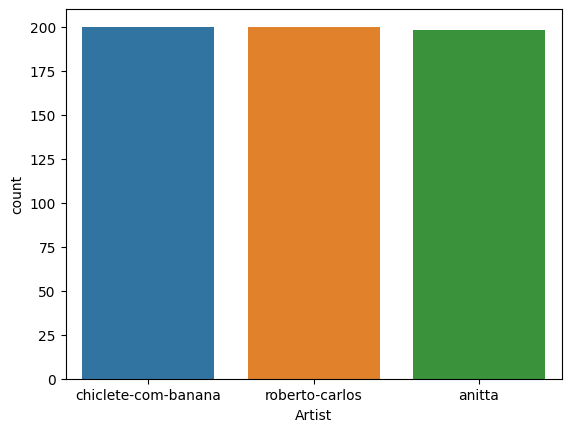

In [17]:
import seaborn as sns

sns.countplot(final.Artist)

# Crie um modelo de classificação para identificar que artista escreveu a música 

## Separe X e y

In [18]:
X = final['Lyrics']
y = final.Artist

## Separe treino e teste

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

## Faça a transformação da coluna em X com count vectorizer e Term Frequency Inverse frequency e a previsão com o modelo de classificação da sua escolha
Se quiser um desafio extra pode usar técnicas de pipeline, caso as músicas forem em inglês pode experimentar técnicas de stematização e lemmatização

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.pipeline import Pipeline

dataprep = Pipeline([
    ('count_vectorizer', CountVectorizer(ngram_range=(2,2), max_df=1000, min_df=5)),
    ('tfidf_transformer', TfidfTransformer())
])


pipeline = Pipeline([
    ('dataprep', dataprep),
    ('model', LogisticRegression(max_iter=5000))
])

pipeline.fit(X_train, y_train)

pipeline.predict(X_test)

array(['roberto-carlos', 'roberto-carlos', 'anitta', 'anitta',
       'roberto-carlos', 'roberto-carlos', 'anitta', 'roberto-carlos',
       'roberto-carlos', 'roberto-carlos', 'anitta', 'anitta',
       'roberto-carlos', 'anitta', 'anitta', 'anitta', 'roberto-carlos',
       'chiclete-com-banana', 'anitta', 'chiclete-com-banana',
       'roberto-carlos', 'anitta', 'roberto-carlos', 'roberto-carlos',
       'roberto-carlos', 'anitta', 'chiclete-com-banana',
       'chiclete-com-banana', 'roberto-carlos', 'chiclete-com-banana',
       'anitta', 'roberto-carlos', 'anitta', 'chiclete-com-banana',
       'roberto-carlos', 'roberto-carlos', 'chiclete-com-banana',
       'chiclete-com-banana', 'anitta', 'roberto-carlos',
       'chiclete-com-banana', 'anitta', 'chiclete-com-banana', 'anitta',
       'anitta', 'anitta', 'roberto-carlos', 'anitta', 'roberto-carlos',
       'roberto-carlos', 'chiclete-com-banana', 'anitta', 'anitta',
       'chiclete-com-banana', 'roberto-carlos', 'anitta', 'an

In [23]:
pd.DataFrame(zip(X_test, pipeline.predict(X_test), y_test))

,0,1,2
0,Olhe a vida que leva E pense profundo Você pod...,roberto-carlos,chiclete-com-banana
1,"Andei, andei, andei Até encontrar Este amor tã...",roberto-carlos,roberto-carlos
2,"Som rastafari Yê, yê babá (Jamaica) Yê Bob Mar...",anitta,chiclete-com-banana
3,Me ligue pra eu te ouvir feliz Me ligue que eu...,anitta,chiclete-com-banana
4,Eu me vi tão só Enfrentando momentos difíceis ...,roberto-carlos,roberto-carlos
...,...,...,...
145,Por trás dessa alegria Tem segredo guardado Co...,chiclete-com-banana,chiclete-com-banana
146,"Ah, esse amor que me arrasta, me gasta e me fa...",chiclete-com-banana,roberto-carlos
147,Tão bela Ela é linda de verdade O que é realme...,chiclete-com-banana,anitta
148,Tanto tempo já vai caminhando E ainda me pego ...,roberto-carlos,roberto-carlos


## Como foi a performance do seu modelo? Quais artistas o modelo mais errou? O que isso significa?

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
pd.DataFrame(
    confusion_matrix(y_test, pipeline.predict(X_test)),
    index=pipeline.classes_,
    columns=pipeline.classes_)

,anitta,chiclete-com-banana,roberto-carlos
anitta,37,4,2
chiclete-com-banana,7,29,10
roberto-carlos,13,9,39


<AxesSubplot:>

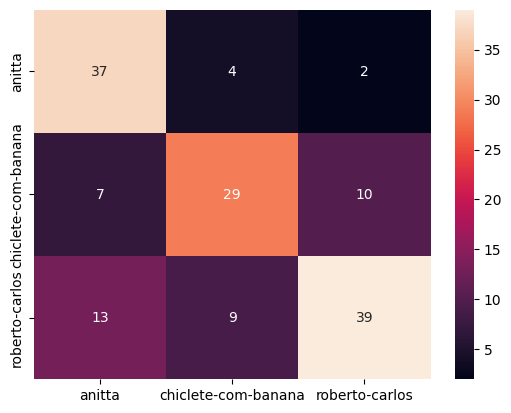

In [29]:
sns.heatmap(
    pd.DataFrame(
    confusion_matrix(y_test, pipeline.predict(X_test)),
    index=pipeline.classes_,
    columns=pipeline.classes_),
    annot=True)

# Bonus. Crie um sistema de recomendação para as músicas no seu dataframe.

In [30]:
from scipy.spatial.distance import pdist, squareform

In [31]:
count_vectorizer = CountVectorizer(ngram_range=(2,2), max_df=1000, min_df=5)
tfidf_transformer = TfidfTransformer()

transformed_vector = count_vectorizer.fit_transform(final.Lyrics)
transformed_vector = tfidf_transformer.fit_transform(transformed_vector)

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfid_vect = TfidfVectorizer(ngram_range=(2,2), max_df=1000, min_df=5)
transformed_vector = tfid_vect.fit_transform(final.Lyrics)

In [33]:
transformed_vector.toarray().shape

(598, 1337)

In [34]:
distances = pd.DataFrame(
    squareform(
    pdist(transformed_vector.toarray(), 
          metric='correlation'))).fillna(2)

In [35]:
similarities = 1 / ( 1 + distances )

In [36]:
similarities_between_chiclete_and_rc = similarities.loc[0:199, 200:399]

In [37]:
similarities_between_rc_and_anitta = similarities.loc[200:399, 400::]

In [38]:
similarities_between_rc_and_anitta.max().sort_values()

469    0.499813
474    0.502722
554    0.502722
424    0.507582
437    0.507588
         ...   
565    0.752942
409    0.762736
543    0.812468
506    0.816419
468    0.867971
Length: 198, dtype: float64

In [39]:
most_similar_song = similarities_between_rc_and_anitta.max().sort_values().index[-1]

In [40]:
most_similar_song


468

In [41]:
similarities_between_rc_and_anitta.loc[:]

,400,401,402,403,404,405,406,407,408,409,...,588,589,590,591,592,593,594,595,596,597
200,0.498332,0.499220,0.497816,0.503601,0.497636,0.504676,0.497780,0.523957,0.498500,0.498317,...,0.498639,0.497494,0.509691,0.497834,0.495780,0.497672,0.533563,0.496681,0.498458,0.508986
201,0.498228,0.497070,0.497680,0.496824,0.497489,0.497527,0.497642,0.497834,0.498406,0.498212,...,0.498555,0.497338,0.497780,0.497699,0.495518,0.497528,0.497381,0.506277,0.498362,0.498990
202,0.497999,0.500486,0.497380,0.496800,0.497797,0.534160,0.497338,0.497554,0.502718,0.497981,...,0.498368,0.512784,0.497494,0.520501,0.494943,0.497208,0.497044,0.510558,0.499787,0.498859
203,0.497309,0.497227,0.496478,0.507793,0.533509,0.508228,0.499318,0.496712,0.499647,0.497284,...,0.497804,0.502636,0.496631,0.505151,0.493213,0.496248,0.496026,0.511146,0.504340,0.498464
204,0.498413,0.497376,0.497922,0.497155,0.497751,0.497785,0.497888,0.503759,0.500406,0.498399,...,0.498706,0.497615,0.498012,0.497939,0.495984,0.497785,0.497654,0.518526,0.498533,0.500384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.497969,0.509901,0.497341,0.505847,0.497123,0.530129,0.497298,0.497518,0.498173,0.497950,...,0.498343,0.505046,0.497456,0.500610,0.494867,0.497166,0.496999,0.513420,0.498122,0.498842
396,0.512330,0.512695,0.496194,0.503271,0.497158,0.504305,0.526293,0.496447,0.500788,0.497065,...,0.497626,0.506253,0.496358,0.502995,0.492669,0.495945,0.495706,0.520753,0.511549,0.498340
397,0.497491,0.496499,0.496715,0.503702,0.496806,0.499185,0.500708,0.496934,0.497742,0.497467,...,0.497952,0.503382,0.496857,0.497889,0.493667,0.496500,0.496294,0.526916,0.502597,0.498568
398,0.496974,0.511721,0.496040,0.500469,0.496793,0.528265,0.506567,0.496303,0.498646,0.496946,...,0.497530,0.510988,0.496211,0.528294,0.492374,0.495781,0.495532,0.507594,0.507491,0.498272


In [42]:
similarities_between_rc_and_anitta.idxmax().loc[most_similar_song]

333

In [43]:
final.reset_index().loc[[394, 542], :]

,index,Lyrics,Artist
394,566,Que bom te encontrar e ver que você está feliz...,roberto-carlos
542,119,Eu tô quase pirando Vendo você dançando Me olh...,anitta


In [44]:
similarities_between_chiclete_and_rc.idxmax()

200    156
201    142
202    168
203    154
204     46
      ... 
395    188
396     38
397     52
398    168
399     18
Length: 200, dtype: int64

In [45]:
most_similar_song = similarities_between_chiclete_and_rc.max().sort_values().index[-1]
print(most_similar_song)
print(similarities_between_chiclete_and_rc.idxmax().loc[most_similar_song])

final.reset_index().loc[[most_similar_song, 
                         similarities_between_chiclete_and_rc.idxmax().loc[most_similar_song]], :]

270
156


,index,Lyrics,Artist
270,243,"Fiu, fiu Que bárbaro! Lá, lá, lá, lá, lá, lá, ...",roberto-carlos
156,151,Lá lá lá lá Lá lá lá lá Ê ôh Lá lá lá lá Lá lá...,chiclete-com-banana


In [46]:
final.reset_index().loc[[most_similar_song, 
                         similarities_between_chiclete_and_rc.idxmax().loc[most_similar_song]], :].Lyrics.values

array(['Fiu, fiu Que bárbaro! Lá, lá, lá, lá, lá, lá, lá, lá, lá , lá, lá, Todo mundo Lá, lá, lá, lá, lá, lá, lá, lá, lá, lá, lá Hum...Lá, lá, lá, lá, lá, lá, lá, lá, lá, lá, lá Vinha caminhando na praia Quando escutei grande gritaria Parei nem sei o que pensei  Como todo bom brasileiro Fui também bancar o olheiro E o que vi não esqueci Nem quero recordar  Um brotinho de monoquini Que antes só usava biquini Vinha caminhando assanhada Pra lá e pra cá  Lá, lá, lá, lá, lá, lá, lá, lá, lá, lá, lá Hum...Lá, lá, lá, lá, lá, lá, lá, lá, lá, lá, lá Me aproximei de mansinho Pra melhor olhar Quando de repente o brotinho Resolveu nadar  Grande confusão outra vez Se não sou forte não tinha vez Nadou, nadou até que cansou E foi pro sol secar  Não posso contar o que vi Mas sei que nunca mais esqueci Broto tem que usar monoquini Não suporto mais o biquini  Broto tem que usar monoquini Não suporto mais o biquini  Lá, lá, lá, lá, lá, lá, lá, lá, lá, lá, lá Hum... Lá, lá, lá, lá, lá, lá, lá, lá, lá, lá,